# Data Exploration - HR Attrition Analysis

### Import Dependencies

The following code block loads all the libraries required for data manipulation, data visualization, data ingestion, and machine learning models. 

In [33]:
# Core data libraries
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# KaggleHub for dataset loading
import kagglehub

# Basic settings
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

The following block ensures that the raw dataset is properly loaded into the memory using Python Kaggle API.

In [34]:
# Download dataset from Kaggle
path = kagglehub.dataset_download("pavansubhasht/ibm-hr-analytics-attrition-dataset")

# List files to see what the dataset contains
import os
os.listdir(path)

['WA_Fn-UseC_-HR-Employee-Attrition.csv']

In [35]:
# Load CSV
df = pd.read_csv(f"{path}/WA_Fn-UseC_-HR-Employee-Attrition.csv")

df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


### Dataset Overview
The dataset contains a total of 35 features each expanding over 1470 entries.

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

## Examination of Missing Values

A heatmap has been plotted to visualize missing values, however, the dataset contains no missing values across any features.

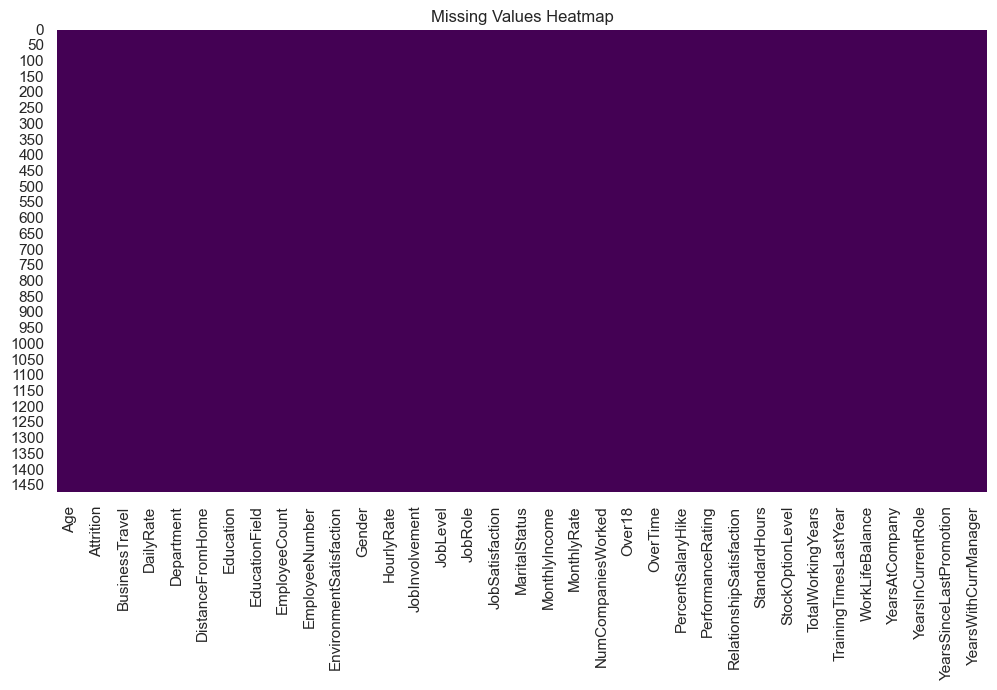

In [37]:
# check for missing values
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

## Summary Statistics - Numeric Variables

In the next step, the summary statistics has been computed to observe the spread and other relevant statistical propertis of numeric values.

In [38]:
# select numeric columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

# summary statistics
df[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


## Frequency Distribution - Categorical Variables

The frequency distribution for different classes within the categorical variables has been observed.

In [39]:
# select categorical columns
cat_cols = df.select_dtypes(include=['object']).columns

# frequency tables
for col in cat_cols:
  print(f"\n--- {col} ---")
  print(df[col].value_counts())


--- Attrition ---
Attrition
No     1233
Yes     237
Name: count, dtype: int64

--- BusinessTravel ---
BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64

--- Department ---
Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64

--- EducationField ---
EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64

--- Gender ---
Gender
Male      882
Female    588
Name: count, dtype: int64

--- JobRole ---
JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: count, dtype: int

In [40]:
# helper function to plot relationship between categorical variable and attrition rate
def plot_attrition_rate_sorted(cat_col):
    # Compute attrition percentages
    rate = (
        df.groupby(cat_col)['Attrition']
        .value_counts(normalize=True)
        .rename('percentage')
        .mul(100)
        .reset_index()
    )

    # Filter for Attrition = Yes
    rate_yes = rate[rate['Attrition'] == 'Yes']

    # Sort descending
    rate_yes = rate_yes.sort_values(by='percentage', ascending=True)

    # Plot
    plt.figure(figsize=(8,4))
    sns.barplot(data=rate_yes, x=cat_col, y='percentage', palette='viridis')

    plt.title(f"Attrition Rate by {cat_col} (Sorted Descending)")
    plt.ylabel("Attrition Rate (%)")
    plt.xticks(rotation=45)
    plt.show()


/var/folders/cq/t39_7qg566x3nr5rw09tf7440000gn/T/ipykernel_52231/1672964097.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=rate_yes, x=cat_col, y='percentage', palette='viridis')


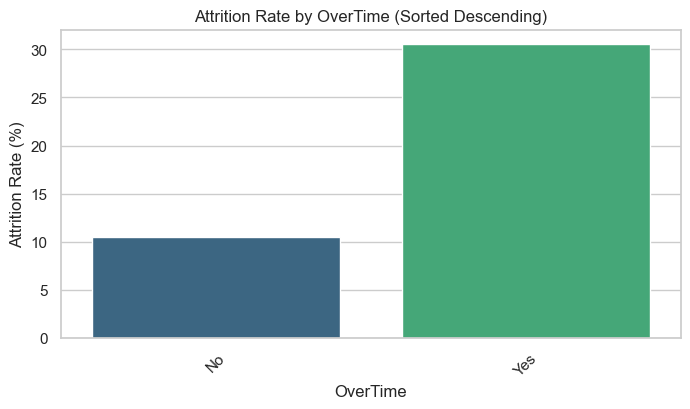

/var/folders/cq/t39_7qg566x3nr5rw09tf7440000gn/T/ipykernel_52231/1672964097.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=rate_yes, x=cat_col, y='percentage', palette='viridis')


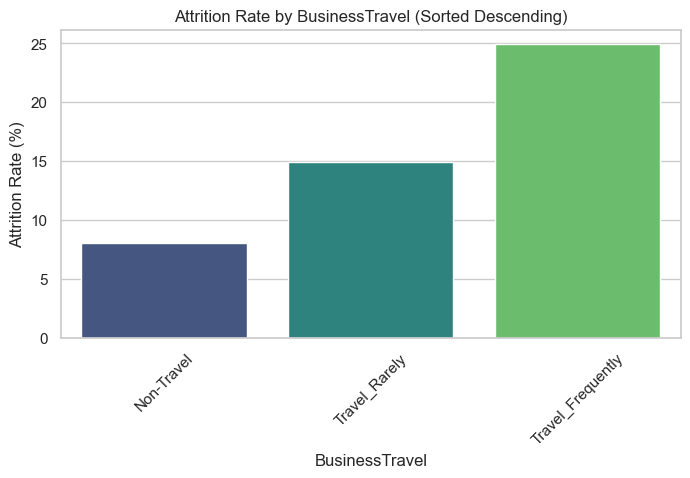

/var/folders/cq/t39_7qg566x3nr5rw09tf7440000gn/T/ipykernel_52231/1672964097.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=rate_yes, x=cat_col, y='percentage', palette='viridis')


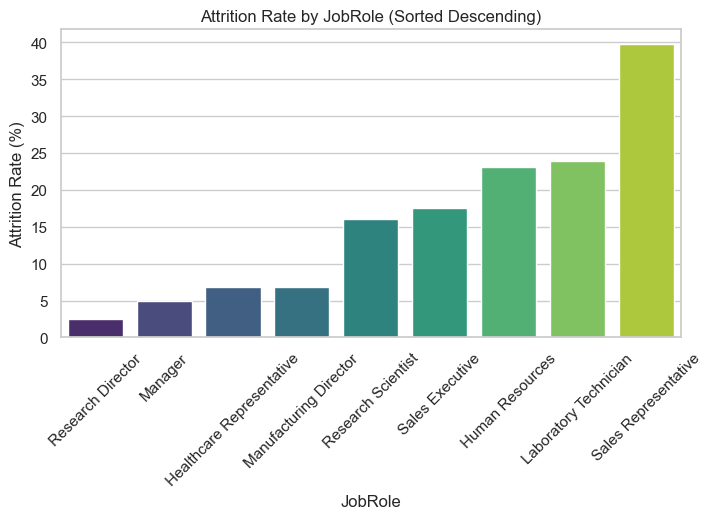

/var/folders/cq/t39_7qg566x3nr5rw09tf7440000gn/T/ipykernel_52231/1672964097.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=rate_yes, x=cat_col, y='percentage', palette='viridis')


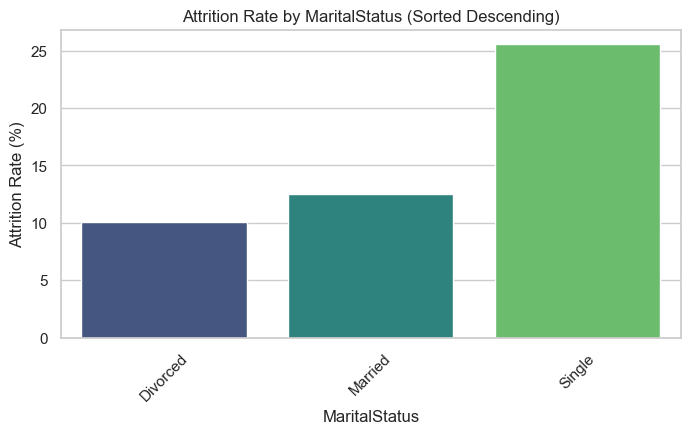

/var/folders/cq/t39_7qg566x3nr5rw09tf7440000gn/T/ipykernel_52231/1672964097.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=rate_yes, x=cat_col, y='percentage', palette='viridis')


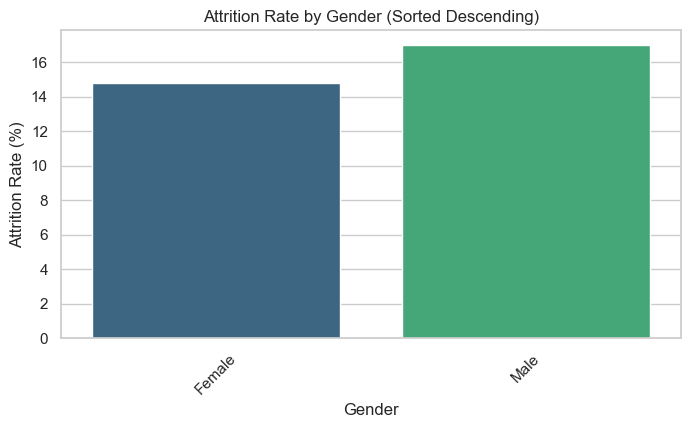

/var/folders/cq/t39_7qg566x3nr5rw09tf7440000gn/T/ipykernel_52231/1672964097.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=rate_yes, x=cat_col, y='percentage', palette='viridis')


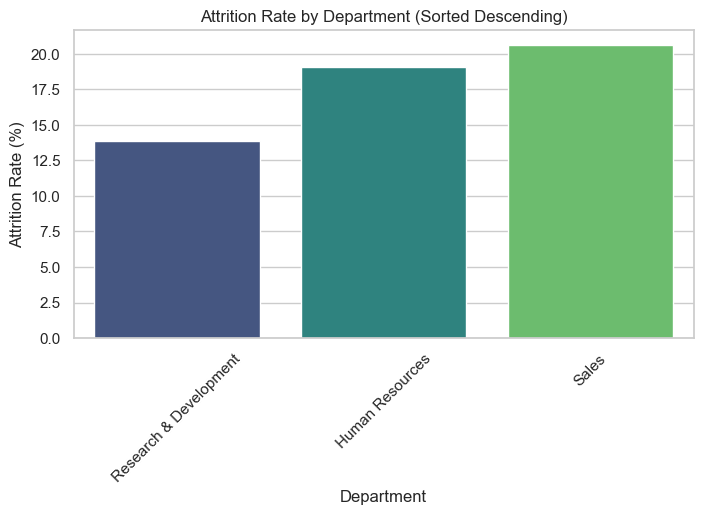

In [41]:
plot_attrition_rate_sorted('OverTime')
plot_attrition_rate_sorted('BusinessTravel')
plot_attrition_rate_sorted('JobRole')
plot_attrition_rate_sorted('MaritalStatus')
plot_attrition_rate_sorted('Gender')
plot_attrition_rate_sorted('Department')


/var/folders/cq/t39_7qg566x3nr5rw09tf7440000gn/T/ipykernel_52231/3760285547.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Attrition', y=col, palette='viridis')


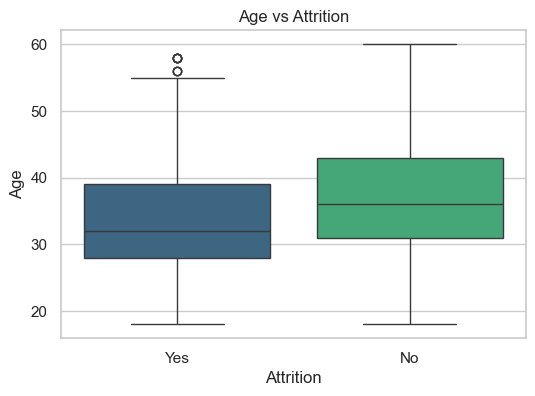

/var/folders/cq/t39_7qg566x3nr5rw09tf7440000gn/T/ipykernel_52231/3760285547.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Attrition', y=col, palette='viridis')


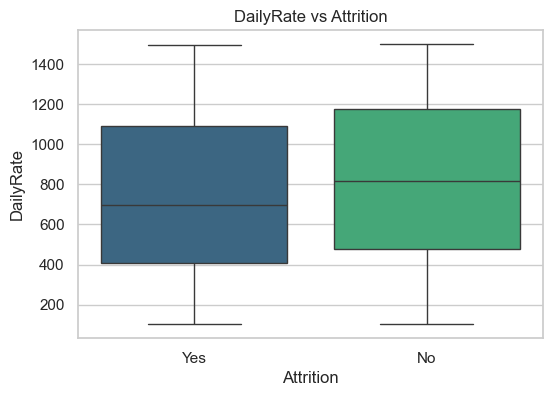

/var/folders/cq/t39_7qg566x3nr5rw09tf7440000gn/T/ipykernel_52231/3760285547.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Attrition', y=col, palette='viridis')


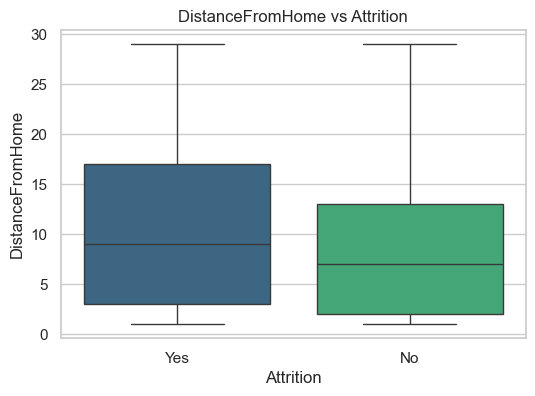

/var/folders/cq/t39_7qg566x3nr5rw09tf7440000gn/T/ipykernel_52231/3760285547.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Attrition', y=col, palette='viridis')


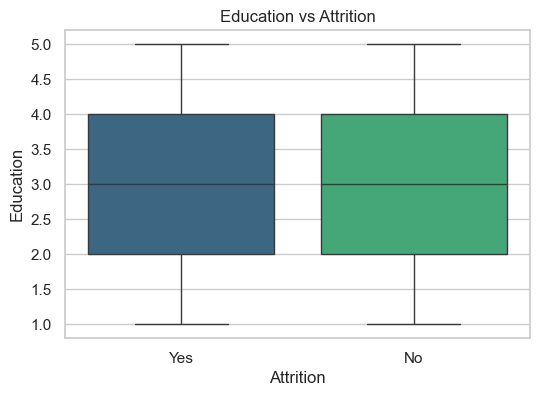

/var/folders/cq/t39_7qg566x3nr5rw09tf7440000gn/T/ipykernel_52231/3760285547.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Attrition', y=col, palette='viridis')


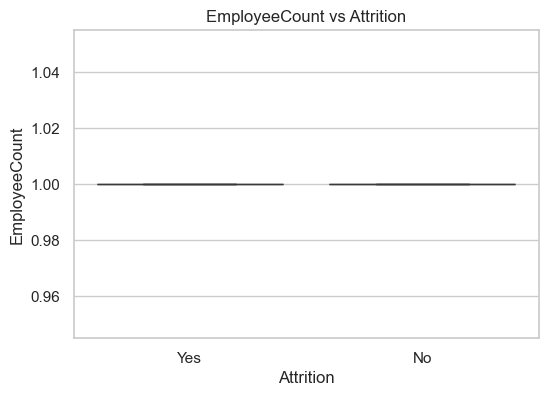

/var/folders/cq/t39_7qg566x3nr5rw09tf7440000gn/T/ipykernel_52231/3760285547.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Attrition', y=col, palette='viridis')


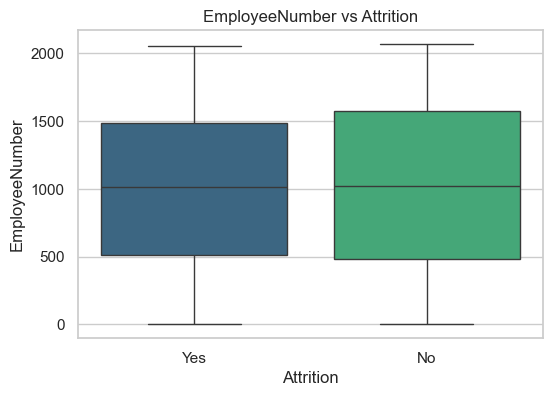

/var/folders/cq/t39_7qg566x3nr5rw09tf7440000gn/T/ipykernel_52231/3760285547.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Attrition', y=col, palette='viridis')


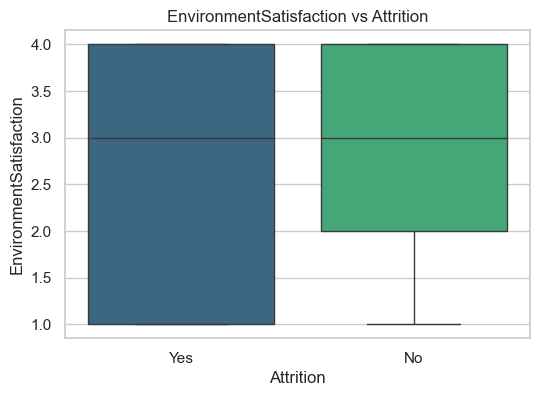

/var/folders/cq/t39_7qg566x3nr5rw09tf7440000gn/T/ipykernel_52231/3760285547.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Attrition', y=col, palette='viridis')


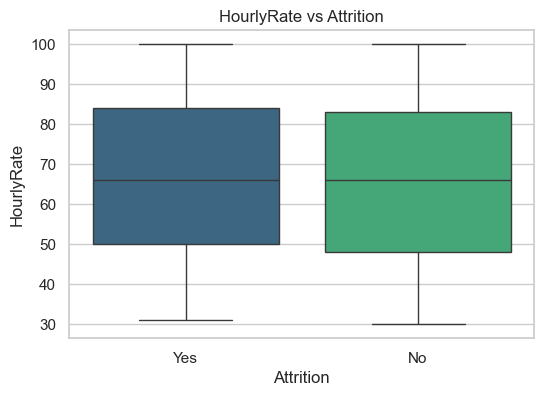

/var/folders/cq/t39_7qg566x3nr5rw09tf7440000gn/T/ipykernel_52231/3760285547.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Attrition', y=col, palette='viridis')


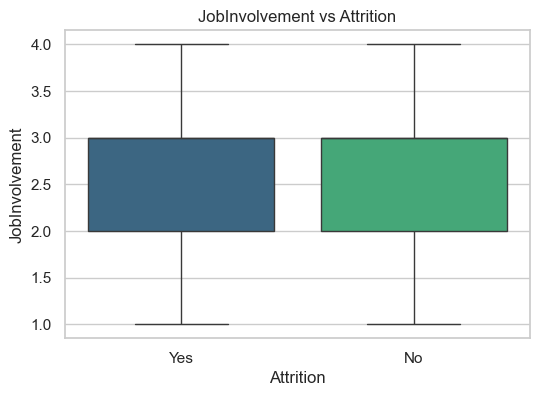

/var/folders/cq/t39_7qg566x3nr5rw09tf7440000gn/T/ipykernel_52231/3760285547.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Attrition', y=col, palette='viridis')


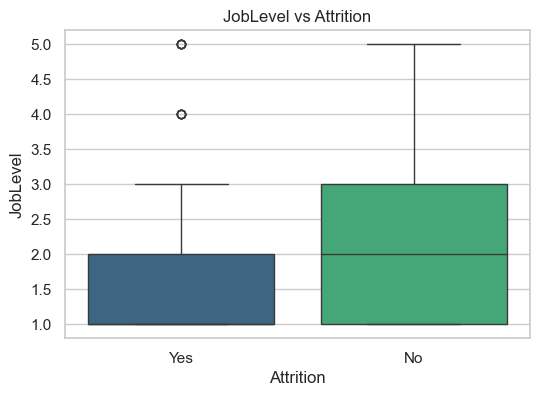

/var/folders/cq/t39_7qg566x3nr5rw09tf7440000gn/T/ipykernel_52231/3760285547.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Attrition', y=col, palette='viridis')


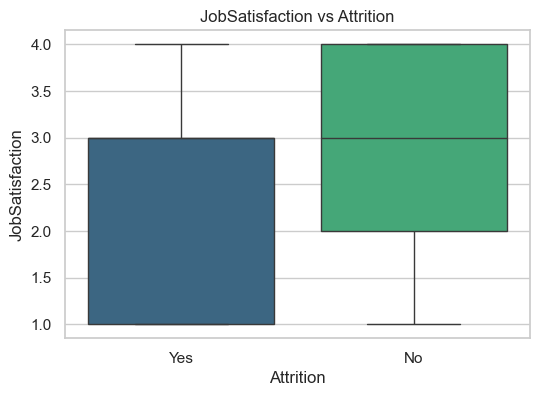

/var/folders/cq/t39_7qg566x3nr5rw09tf7440000gn/T/ipykernel_52231/3760285547.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Attrition', y=col, palette='viridis')


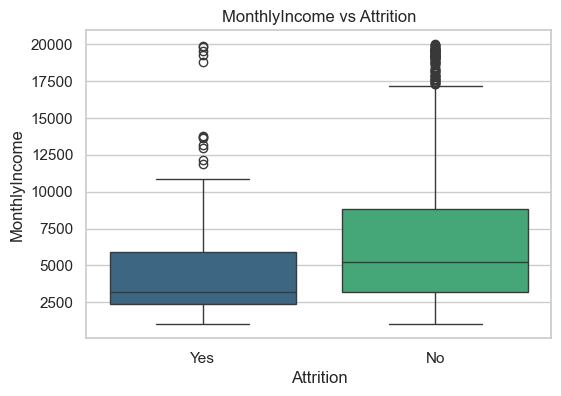

/var/folders/cq/t39_7qg566x3nr5rw09tf7440000gn/T/ipykernel_52231/3760285547.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Attrition', y=col, palette='viridis')


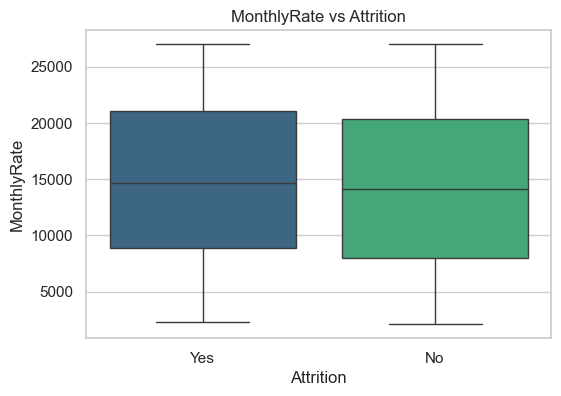

/var/folders/cq/t39_7qg566x3nr5rw09tf7440000gn/T/ipykernel_52231/3760285547.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Attrition', y=col, palette='viridis')


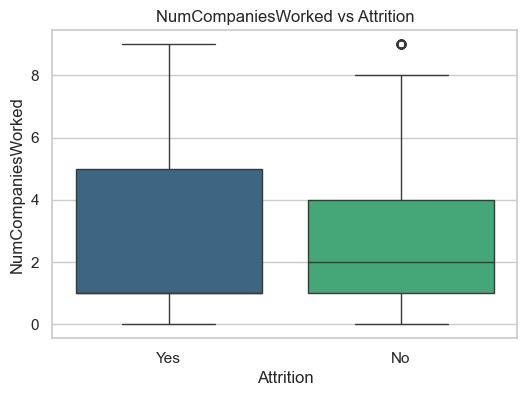

/var/folders/cq/t39_7qg566x3nr5rw09tf7440000gn/T/ipykernel_52231/3760285547.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Attrition', y=col, palette='viridis')


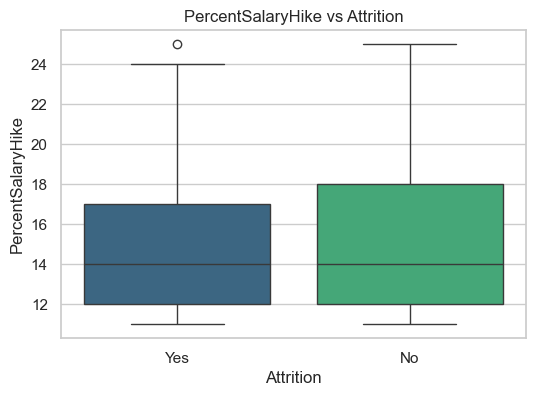

/var/folders/cq/t39_7qg566x3nr5rw09tf7440000gn/T/ipykernel_52231/3760285547.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Attrition', y=col, palette='viridis')


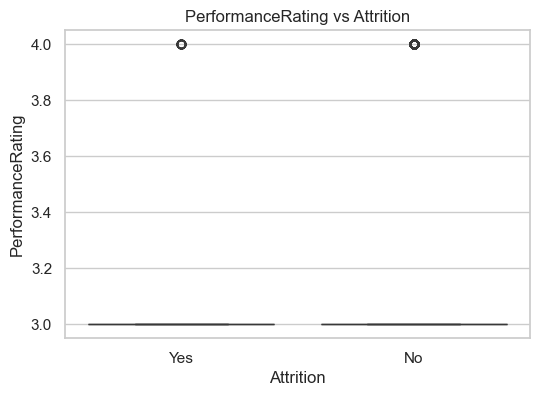

/var/folders/cq/t39_7qg566x3nr5rw09tf7440000gn/T/ipykernel_52231/3760285547.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Attrition', y=col, palette='viridis')


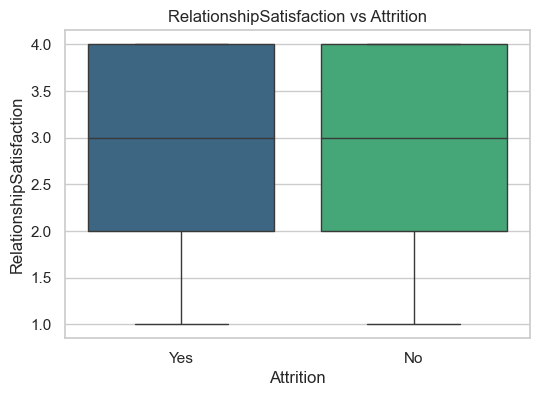

/var/folders/cq/t39_7qg566x3nr5rw09tf7440000gn/T/ipykernel_52231/3760285547.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Attrition', y=col, palette='viridis')


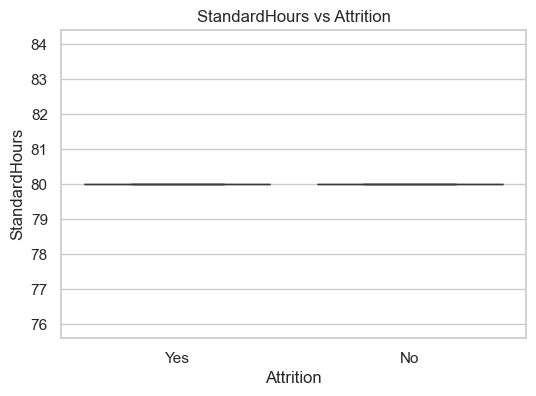

/var/folders/cq/t39_7qg566x3nr5rw09tf7440000gn/T/ipykernel_52231/3760285547.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Attrition', y=col, palette='viridis')


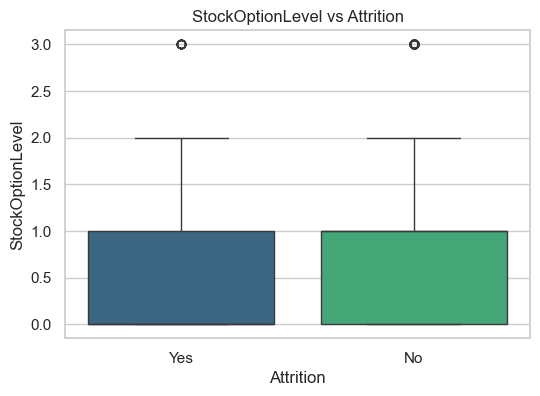

/var/folders/cq/t39_7qg566x3nr5rw09tf7440000gn/T/ipykernel_52231/3760285547.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Attrition', y=col, palette='viridis')


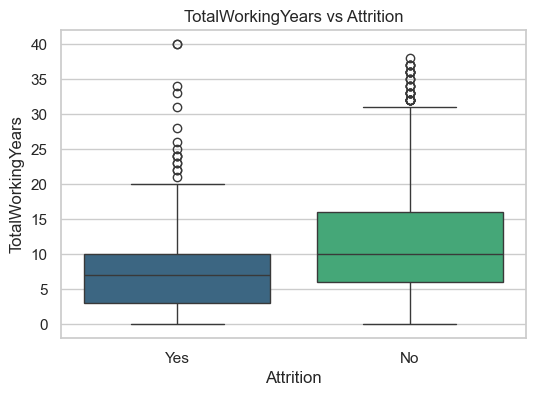

/var/folders/cq/t39_7qg566x3nr5rw09tf7440000gn/T/ipykernel_52231/3760285547.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Attrition', y=col, palette='viridis')


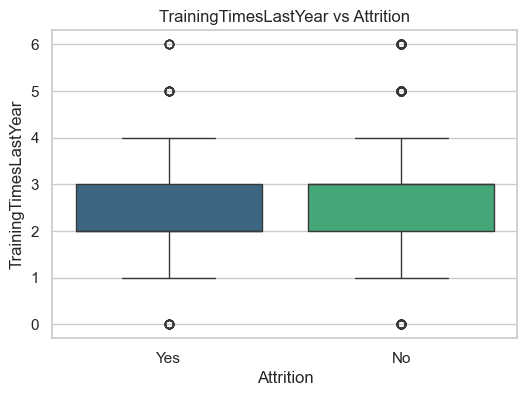

/var/folders/cq/t39_7qg566x3nr5rw09tf7440000gn/T/ipykernel_52231/3760285547.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Attrition', y=col, palette='viridis')


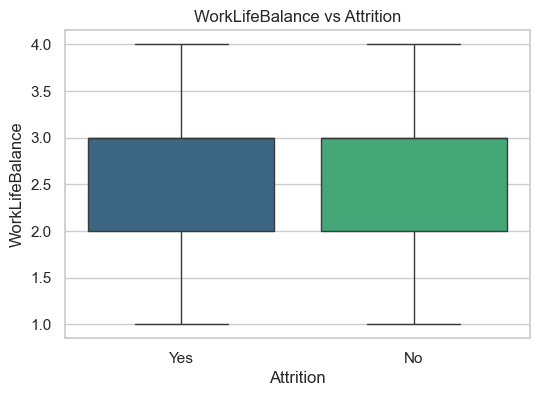

/var/folders/cq/t39_7qg566x3nr5rw09tf7440000gn/T/ipykernel_52231/3760285547.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Attrition', y=col, palette='viridis')


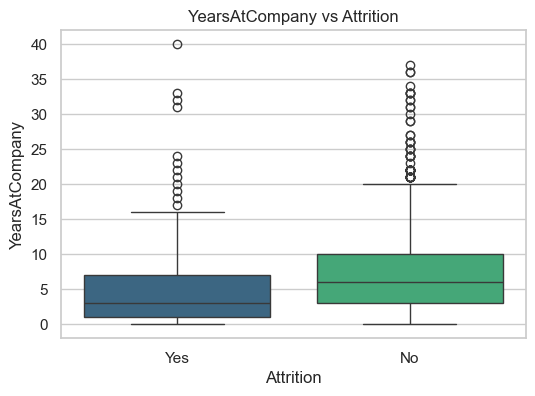

/var/folders/cq/t39_7qg566x3nr5rw09tf7440000gn/T/ipykernel_52231/3760285547.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Attrition', y=col, palette='viridis')


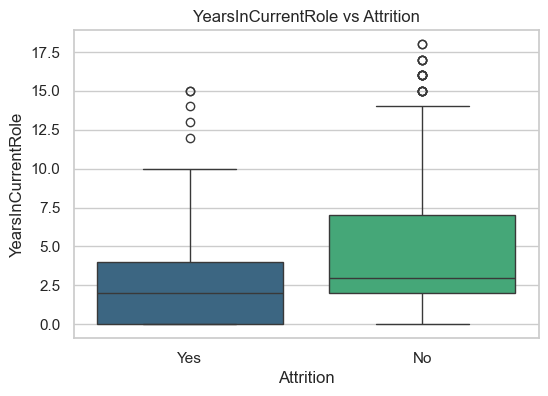

/var/folders/cq/t39_7qg566x3nr5rw09tf7440000gn/T/ipykernel_52231/3760285547.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Attrition', y=col, palette='viridis')


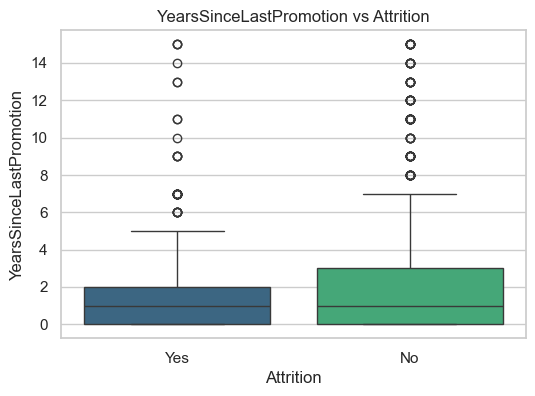

/var/folders/cq/t39_7qg566x3nr5rw09tf7440000gn/T/ipykernel_52231/3760285547.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Attrition', y=col, palette='viridis')


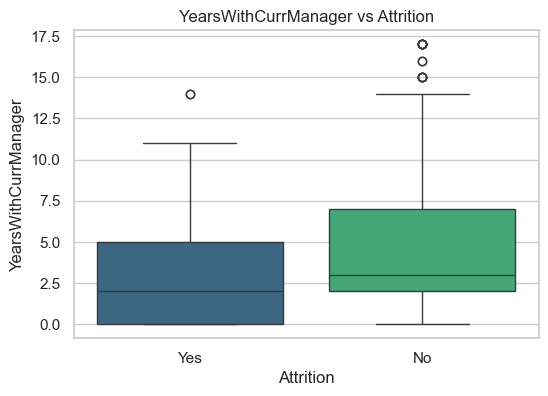

In [42]:
# helper function to plot relationship between numerical variables and attrition (box-plot)
def plot_box(col):
    plt.figure(figsize=(6,4))
    sns.boxplot(data=df, x='Attrition', y=col, palette='viridis')
    plt.title(f"{col} vs Attrition")
    plt.xlabel("Attrition")
    plt.ylabel(col)
    plt.show()

for col in num_cols:
    plot_box(col)


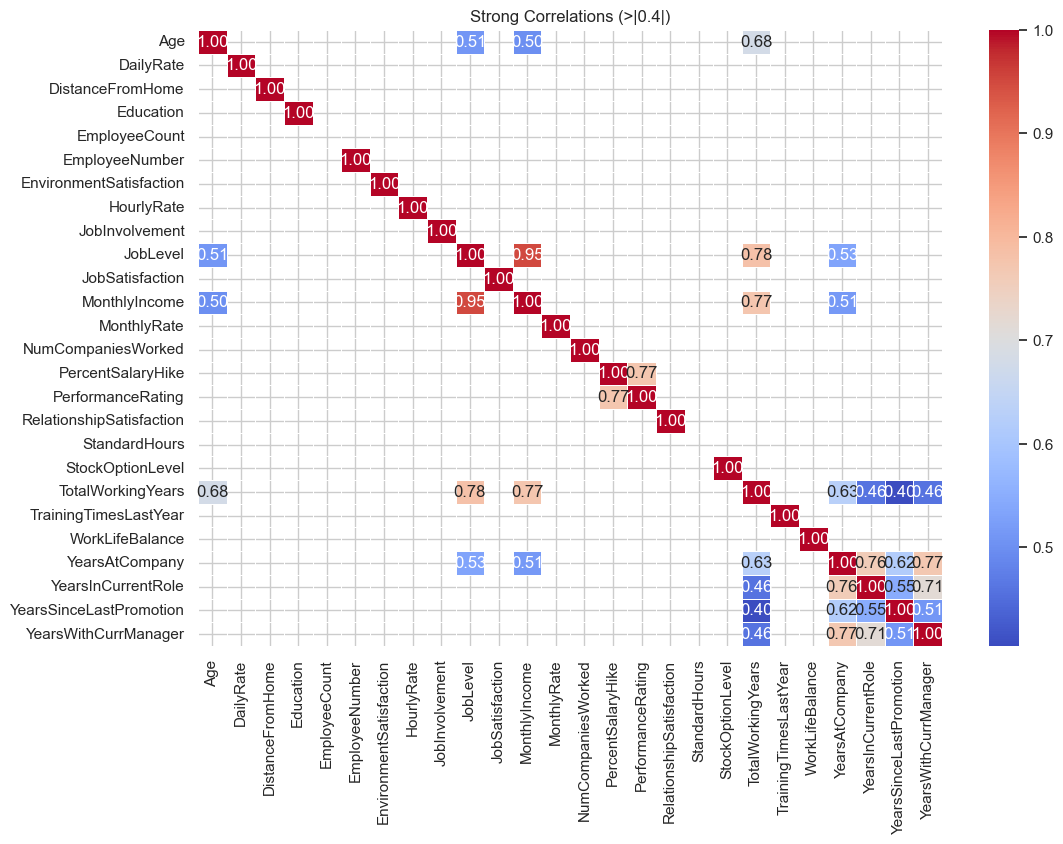

In [43]:
# correlation matrix for numerical variables, only print for correlation above |0.4|
corr = df[num_cols].corr().abs()

# Keep only correlations above threshold
strong_corr = corr[corr > 0.4]

plt.figure(figsize=(12, 8))
sns.heatmap(strong_corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Strong Correlations (>|0.4|)")
plt.show()

In [44]:
corr_matrix = df[num_cols].corr().abs()

# Unstack the matrix to long format
corr_pairs = corr_matrix.unstack().reset_index()
corr_pairs.columns = ['Feature1', 'Feature2', 'Correlation']

# Filter out self-correlations
corr_pairs = corr_pairs[corr_pairs['Feature1'] != corr_pairs['Feature2']]

# Keep only high correlations
high_corr = corr_pairs[corr_pairs['Correlation'] > 0.4]

# Remove mirrored duplicates (A-B and B-A)
high_corr = high_corr.drop_duplicates(subset=['Correlation'])

# Sort descending
high_corr = high_corr.sort_values(by='Correlation', ascending=False)

high_corr

,Feature1,Feature2,Correlation
245,JobLevel,MonthlyIncome,0.950300
253,JobLevel,TotalWorkingYears,0.782208
379,PercentSalaryHike,PerformanceRating,0.773550
305,MonthlyIncome,TotalWorkingYears,0.772893
597,YearsAtCompany,YearsWithCurrManager,0.769212
595,YearsAtCompany,YearsInCurrentRole,0.758754
623,YearsInCurrentRole,YearsWithCurrManager,0.714365
19,Age,TotalWorkingYears,0.680381
516,TotalWorkingYears,YearsAtCompany,0.628133
596,YearsAtCompany,YearsSinceLastPromotion,0.618409


In [45]:
import numpy as np

# 1. Career progression inside the company
df["CareerProgressionIndex"] = df["JobLevel"] / (df["YearsAtCompany"] + 1)

# 2. Stability with the same manager
df["RoleStability"] = df["YearsWithCurrManager"] / (df["YearsAtCompany"] + 1)

# 3. Promotion gap relative to tenure
df["PromotionGap"] = df["YearsSinceLastPromotion"] / (df["YearsAtCompany"] + 1)

# 4. Income per job level  "how well paid is this level"
df["IncomePerLevel"] = df["MonthlyIncome"] / df["JobLevel"]

# 5. Income per year of experience  "return on experience"
df["IncomePerExperienceYear"] = df["MonthlyIncome"] / (df["TotalWorkingYears"] + 1)

# 6. Share of experience spent at this company
df["CompanyTenureShare"] = df["YearsAtCompany"] / (df["TotalWorkingYears"] + 1)

# 7. Experience before joining this company
df["ExperienceBeforeCompany"] = (df["TotalWorkingYears"] - df["YearsAtCompany"]).clip(lower=0)


In [46]:
# Drop only numeric or engineered features, keep all categoricals like Over18

cols_to_drop = [
    # Completely uninformative or ID like numeric columns
    "EmployeeCount",
    "StandardHours",
    "EmployeeNumber",

    # Low value rate like measures
    "DailyRate",
    "HourlyRate",
    "MonthlyRate",
    "PerformanceRating",

    # Raw salary and level variables replaced by engineered ratios
    "MonthlyIncome",
    "JobLevel",

    # Original tenure components now captured via engineered features
    "Age",
    "YearsAtCompany",
    "YearsInCurrentRole",
    "YearsWithCurrManager",
    "YearsSinceLastPromotion",

    # Engineered features you chose to drop due to high collinearity
    "IncomePerLevel",
    "IncomePerExperienceYear",
    "CareerProgressionIndex",
    "RoleStability",
    "PromotionGap",
    "ExperienceBeforeCompany"
]

df = df.drop(columns=[c for c in cols_to_drop if c in df.columns])


In [47]:
num_cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
num_cols


['DistanceFromHome',
 'Education',
 'EnvironmentSatisfaction',
 'JobInvolvement',
 'JobSatisfaction',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'CompanyTenureShare']

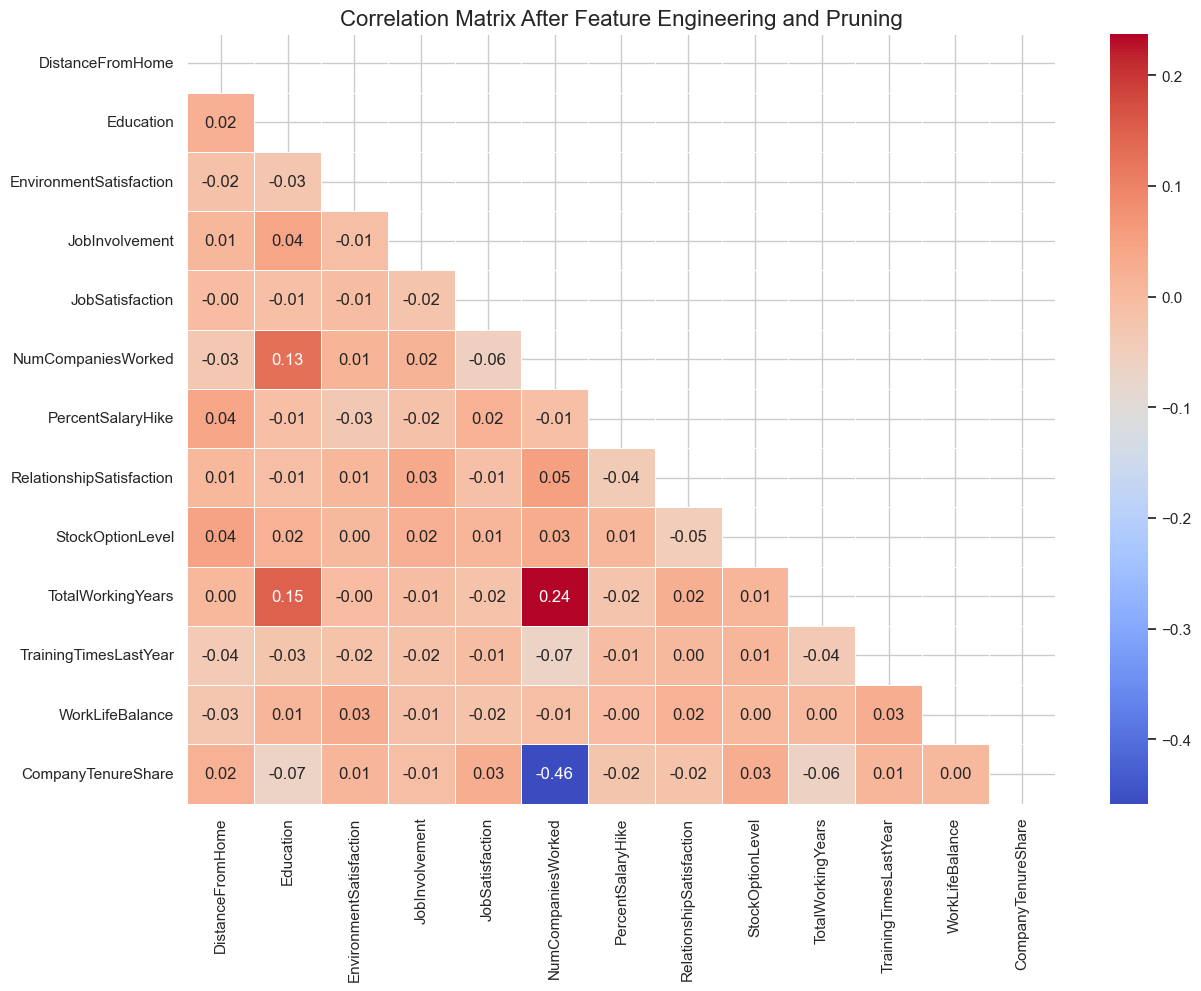

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Select remaining numeric columns
num_cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()

# 2. Compute correlation matrix
corr_matrix = df[num_cols].corr()

# 3. Mask for upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# 4. Plot heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(
    corr_matrix,
    mask=mask,
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    linewidths=0.5,
    cbar=True
)
plt.title("Correlation Matrix After Feature Engineering and Pruning", fontsize=16)
plt.show()


In [49]:
# Identify categorical columns explicitly
cat_cols = [
    "Attrition",
    "BusinessTravel",
    "Department",
    "EducationField",
    "Gender",
    "JobRole",
    "MaritalStatus",
    "OverTime",
    "Over18"
]

cat_levels = pd.DataFrame({
    "feature": cat_cols,
    "n_levels": [df[c].nunique() for c in cat_cols]
})

cat_levels


,feature,n_levels
0,Attrition,2
1,BusinessTravel,3
2,Department,3
3,EducationField,6
4,Gender,2
5,JobRole,9
6,MaritalStatus,3
7,OverTime,2
8,Over18,1


In [50]:
df["EducationField"].value_counts()

EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64

In [51]:
df["JobRole"].value_counts()

JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: count, dtype: int64

In [52]:
df["Over18"].value_counts()

Over18
Y    1470
Name: count, dtype: int64

In [53]:
# dropping over18 because for sure we are dropping it
if "Over18" in df.columns:
    df = df.drop(columns=["Over18"])

`EducationField` has six levels with very skewed counts. Grouping them into four business meaningful buckets reduces sparsity and keeps the signal about academic background. After the bucket is created, the raw column is no longer needed.

In [54]:
# Bucket EducationField into four groups and drop original column

df["EducationFieldBucket"] = df["EducationField"].replace({
    "Life Sciences": "Health_Sciences",   # science and bio related
    "Medical": "Health_Sciences",         # clinical and medical degrees

    "Marketing": "Business",              # business oriented education

    "Technical Degree": "Technical",      # engineering or technical programs

    "Other": "Other_Field",               # small miscellaneous group
    "Human Resources": "Other_Field"      # very small, merged into Other_Field
})

# Drop the original high cardinality column
df = df.drop(columns=["EducationField"])


In [55]:
df["EducationFieldBucket"].value_counts()

EducationFieldBucket
Health_Sciences    1070
Business            159
Technical           132
Other_Field         109
Name: count, dtype: int64

`JobRole` has nine levels but several of them belong to the same functional area. Grouping them into five role families keeps business interpretability and avoids too many sparse dummy variables. The raw `JobRole` is then removed.

In [56]:
# Bucket JobRole into functional groups and drop original column

df["JobRoleBucket"] = df["JobRole"].replace({
    # Research and lab type work
    "Research Scientist": "Research_Lab",
    "Laboratory Technician": "Research_Lab",
    "Research Director": "Research_Lab",

    # Sales roles
    "Sales Executive": "Sales",
    "Sales Representative": "Sales",

    # Operations and production
    "Manufacturing Director": "Manufacturing",

    # Client facing healthcare role
    "Healthcare Representative": "Healthcare",

    # Management and HR support
    "Manager": "Management_Admin",
    "Human Resources": "Management_Admin"
})

# Drop the original detailed role column
df = df.drop(columns=["JobRole"])


In [57]:
df["JobRoleBucket"].value_counts()

JobRoleBucket
Research_Lab        631
Sales               409
Management_Admin    154
Manufacturing       145
Healthcare          131
Name: count, dtype: int64

In [58]:
import pandas as pd

def encode_hr_categoricals(df: pd.DataFrame) -> pd.DataFrame:
    """
    Encode categorical variables for the IBM HR attrition dataset.

    Assumptions:
      - Bucketing is already done:
          EducationFieldBucket, JobRoleBucket exist.
      - Over18 has been dropped.
      - Attrition, BusinessTravel, Department, Gender,
        MaritalStatus, OverTime are present.
    """
    df_encoded = df.copy()

    # 1. Binary encode simple yes/no and gender
    if "Attrition" in df_encoded.columns:
        df_encoded["Attrition"] = df_encoded["Attrition"].map({"No": 0, "Yes": 1})

    if "Gender" in df_encoded.columns:
        df_encoded["Gender"] = df_encoded["Gender"].map({"Female": 0, "Male": 1})

    if "OverTime" in df_encoded.columns:
        df_encoded["OverTime"] = df_encoded["OverTime"].map({"No": 0, "Yes": 1})

    # 2. One hot encode multi level categorical buckets
    one_hot_cols = [
        col for col in [
            "BusinessTravel",
            "Department",
            "EducationFieldBucket",
            "JobRoleBucket",
            "MaritalStatus"
        ]
        if col in df_encoded.columns
    ]

    df_encoded = pd.get_dummies(
        df_encoded,
        columns=one_hot_cols,
        drop_first=True
    )

    return df_encoded


In [59]:
df_encoded = encode_hr_categoricals(df)

df_encoded.info()
df_encoded.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 29 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Attrition                             1470 non-null   int64  
 1   DistanceFromHome                      1470 non-null   int64  
 2   Education                             1470 non-null   int64  
 3   EnvironmentSatisfaction               1470 non-null   int64  
 4   Gender                                1470 non-null   int64  
 5   JobInvolvement                        1470 non-null   int64  
 6   JobSatisfaction                       1470 non-null   int64  
 7   NumCompaniesWorked                    1470 non-null   int64  
 8   OverTime                              1470 non-null   int64  
 9   PercentSalaryHike                     1470 non-null   int64  
 10  RelationshipSatisfaction              1470 non-null   int64  
 11  StockOptionLevel 

,Attrition,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,JobInvolvement,JobSatisfaction,NumCompaniesWorked,OverTime,PercentSalaryHike,...,Department_Sales,EducationFieldBucket_Health_Sciences,EducationFieldBucket_Other_Field,EducationFieldBucket_Technical,JobRoleBucket_Management_Admin,JobRoleBucket_Manufacturing,JobRoleBucket_Research_Lab,JobRoleBucket_Sales,MaritalStatus_Married,MaritalStatus_Single
0,1,1,2,2,0,3,4,8,1,11,...,True,True,False,False,False,False,False,True,False,True
1,0,8,1,3,1,2,2,1,0,23,...,False,True,False,False,False,False,True,False,True,False
2,1,2,2,4,1,2,3,6,1,15,...,False,False,True,False,False,False,True,False,False,True
3,0,3,4,4,0,3,3,1,1,11,...,False,True,False,False,False,False,True,False,True,False
4,0,2,1,1,1,3,2,9,0,12,...,False,True,False,False,False,False,True,False,True,False


In [60]:
num_cols = df_encoded.select_dtypes(include=["int64", "float64"]).columns.tolist()

print("Numerical columns:")
for col in num_cols:
    print("-", col)


Numerical columns:
- Attrition
- DistanceFromHome
- Education
- EnvironmentSatisfaction
- Gender
- JobInvolvement
- JobSatisfaction
- NumCompaniesWorked
- OverTime
- PercentSalaryHike
- RelationshipSatisfaction
- StockOptionLevel
- TotalWorkingYears
- TrainingTimesLastYear
- WorkLifeBalance
- CompanyTenureShare


In [61]:
print("Numeric columns:", num_cols)

df_encoded[num_cols].head()


Numeric columns: ['Attrition', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobSatisfaction', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'CompanyTenureShare']


,Attrition,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,JobInvolvement,JobSatisfaction,NumCompaniesWorked,OverTime,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,CompanyTenureShare
0,1,1,2,2,0,3,4,8,1,11,1,0,8,0,1,0.666667
1,0,8,1,3,1,2,2,1,0,23,4,1,10,3,3,0.909091
2,1,2,2,4,1,2,3,6,1,15,2,0,7,3,3,0.000000
3,0,3,4,4,0,3,3,1,1,11,3,0,8,3,3,0.888889
4,0,2,1,1,1,3,2,9,0,12,4,1,6,3,3,0.285714


In [62]:
# Show summary statistics for all numeric columns
df_encoded.describe().T

,count,mean,std,min,25%,50%,75%,max
Attrition,1470.0,0.161224,0.367863,0.0,0.000000,0.000000,0.000000,1.00000
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.000000,7.000000,14.000000,29.00000
Education,1470.0,2.912925,1.024165,1.0,2.000000,3.000000,4.000000,5.00000
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.000000,3.000000,4.000000,4.00000
Gender,1470.0,0.600000,0.490065,0.0,0.000000,1.000000,1.000000,1.00000
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.000000,3.000000,3.000000,4.00000
JobSatisfaction,1470.0,2.728571,1.102846,1.0,2.000000,3.000000,4.000000,4.00000
NumCompaniesWorked,1470.0,2.693197,2.498009,0.0,1.000000,2.000000,4.000000,9.00000
OverTime,1470.0,0.282993,0.450606,0.0,0.000000,0.000000,1.000000,1.00000
PercentSalaryHike,1470.0,15.209524,3.659938,11.0,12.000000,14.000000,18.000000,25.00000


In [63]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 29 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Attrition                             1470 non-null   int64  
 1   DistanceFromHome                      1470 non-null   int64  
 2   Education                             1470 non-null   int64  
 3   EnvironmentSatisfaction               1470 non-null   int64  
 4   Gender                                1470 non-null   int64  
 5   JobInvolvement                        1470 non-null   int64  
 6   JobSatisfaction                       1470 non-null   int64  
 7   NumCompaniesWorked                    1470 non-null   int64  
 8   OverTime                              1470 non-null   int64  
 9   PercentSalaryHike                     1470 non-null   int64  
 10  RelationshipSatisfaction              1470 non-null   int64  
 11  StockOptionLevel 

In [64]:
from sklearn.preprocessing import StandardScaler

# num_cols already defined as:
# num_cols = df_encoded.select_dtypes(include=["int64", "float64"]).columns.tolist()

# 1. Do not scale binary encoded variables
binary_cols = ["Attrition", "Gender", "OverTime"]

# 2. Keep only numeric columns that are not binary
num_to_scale = [c for c in num_cols if c not in binary_cols]

print("Numeric columns to scale:")
for c in num_to_scale:
    print("-", c)

# 3. Scale these numeric features
scaler = StandardScaler()

df_scaled = df_encoded.copy()
df_scaled[num_to_scale] = scaler.fit_transform(df_scaled[num_to_scale])

# 4. Quick sanity check
df_scaled[num_to_scale].describe().T


Numeric columns to scale:
- DistanceFromHome
- Education
- EnvironmentSatisfaction
- JobInvolvement
- JobSatisfaction
- NumCompaniesWorked
- PercentSalaryHike
- RelationshipSatisfaction
- StockOptionLevel
- TotalWorkingYears
- TrainingTimesLastYear
- WorkLifeBalance
- CompanyTenureShare


,count,mean,std,min,25%,50%,75%,max
DistanceFromHome,1470.0,4.350262e-17,1.00034,-1.010909,-0.887515,-0.270544,0.593216,2.444129
Education,1470.0,7.008755e-17,1.00034,-1.868426,-0.891688,0.085049,1.061787,2.038524
EnvironmentSatisfaction,1470.0,1.305078e-16,1.00034,-1.575686,-0.660531,0.254625,1.169781,1.169781
JobInvolvement,1470.0,6.525392e-17,1.00034,-2.432006,-1.026167,0.379672,0.379672,1.785511
JobSatisfaction,1470.0,-9.183886e-17,1.00034,-1.567907,-0.660853,0.246200,1.153254,1.153254
NumCompaniesWorked,1470.0,1.450087e-17,1.00034,-1.078504,-0.678049,-0.277594,0.523316,2.525591
PercentSalaryHike,1470.0,2.271803e-16,1.00034,-1.150554,-0.877232,-0.330589,0.762698,2.675949
RelationshipSatisfaction,1470.0,9.667248e-17,1.00034,-1.584178,-0.658973,0.266233,1.191438,1.191438
StockOptionLevel,1470.0,6.767074e-17,1.00034,-0.932014,-0.932014,0.241988,0.241988,2.589994
TotalWorkingYears,1470.0,-1.208406e-18,1.00034,-1.450167,-0.678774,-0.164511,0.478316,3.692454


## Save Processed Data for Next Notebook

The following cell saves the processed and scaled dataframe (`df_scaled`) and the scaler object to disk. This allows notebook 02 to load the pre-processed data without re-running all data cleaning and feature engineering steps.


In [74]:
# ============================================================
# Save Processed Data for Next Notebook
# ============================================================

import pickle
import os

# Create data directory if it doesn't exist
data_dir = "../data/processed"
os.makedirs(data_dir, exist_ok=True)

# Save the processed dataframe
with open(f"{data_dir}/df_scaled.pkl", "wb") as f:
    pickle.dump(df_scaled, f)

# Save the scaler (important for future transformations)
with open(f"{data_dir}/scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

# Also save as CSV for easy inspection (optional)
df_scaled.to_csv(f"{data_dir}/df_scaled.csv", index=False)

print("=" * 70)
print("PROCESSED DATA SAVED SUCCESSFULLY")
print("=" * 70)
print(f" Saved df_scaled to: {data_dir}/df_scaled.pkl")
print(f" Saved scaler to: {data_dir}/scaler.pkl")
print(f" Saved CSV backup to: {data_dir}/df_scaled.csv")
print(f"\nDataFrame shape: {df_scaled.shape}")
print(f"Columns: {df_scaled.shape[1]}")
print(f"Rows: {df_scaled.shape[0]}")
print(f"\nAttrition distribution:")
print(df_scaled["Attrition"].value_counts())
print("\n" + "=" * 70)
print(" Data ready for notebook 02: Baseline Logistic Regression")
print("=" * 70)


PROCESSED DATA SAVED SUCCESSFULLY
✓ Saved df_scaled to: ../data/processed/df_scaled.pkl
✓ Saved scaler to: ../data/processed/scaler.pkl
✓ Saved CSV backup to: ../data/processed/df_scaled.csv

DataFrame shape: (1470, 29)
Columns: 29
Rows: 1470

Attrition distribution:
Attrition
0    1233
1     237
Name: count, dtype: int64

✓ Data ready for notebook 02: Baseline Logistic Regression
